In [221]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [222]:
orig_train = pd.read_csv('original.csv')
print(f"original data is of the shape :{orig_train.shape}")

original data is of the shape :(2111, 17)


In [223]:
ss = pd.read_csv('sample_submission.csv')
ss.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


In [224]:
ss.nunique()

id            13840
NObeyesdad        1
dtype: int64

In [225]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [226]:
print(f'the shape of train data is {train.shape} and that of the test data is {test.shape}')
train.head()

the shape of train data is (20758, 18) and that of the test data is (13840, 17)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [227]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc['min'] = train.min()
desc['max'] = train.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,20758,20758,100.000000,0,0.0,0,20757
Gender,object,20758,2,0.009635,0,0.0,Female,Male
Age,float64,20758,1703,8.204066,0,0.0,14.0,61.0
Height,float64,20758,1833,8.830330,0,0.0,1.45,1.975663
Weight,float64,20758,1979,9.533674,0,0.0,39.0,165.057269
family_history_with_overweight,object,20758,2,0.009635,0,0.0,no,yes
FAVC,object,20758,2,0.009635,0,0.0,no,yes
FCVC,float64,20758,934,4.499470,0,0.0,1.0,3.0
NCP,float64,20758,689,3.319202,0,0.0,1.0,4.0
CAEC,object,20758,4,0.019270,0,0.0,Always,no


In [228]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] / len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc['min'] = test.min()
desc['max'] = test.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,13840,13840,100.000000,0,0.0,20758,34597
Gender,object,13840,2,0.014451,0,0.0,Female,Male
Age,float64,13840,1539,11.119942,0,0.0,14.0,61.0
Height,float64,13840,1739,12.565029,0,0.0,1.45,1.98
Weight,float64,13840,1798,12.991329,0,0.0,39.0,165.057269
family_history_with_overweight,object,13840,2,0.014451,0,0.0,no,yes
FAVC,object,13840,2,0.014451,0,0.0,no,yes
FCVC,float64,13840,828,5.982659,0,0.0,1.0,3.0
NCP,float64,13840,649,4.689306,0,0.0,1.0,4.0
CAEC,object,13840,4,0.028902,0,0.0,Always,no


In [229]:
numerical_features = list(test._get_numeric_data())
categorical_features = list(test.drop(numerical_features, axis = 1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


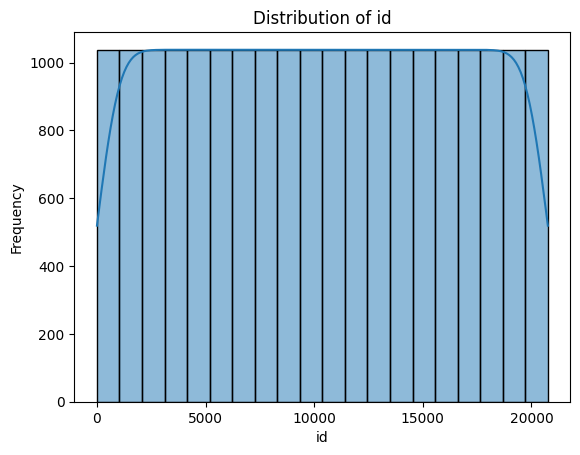

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


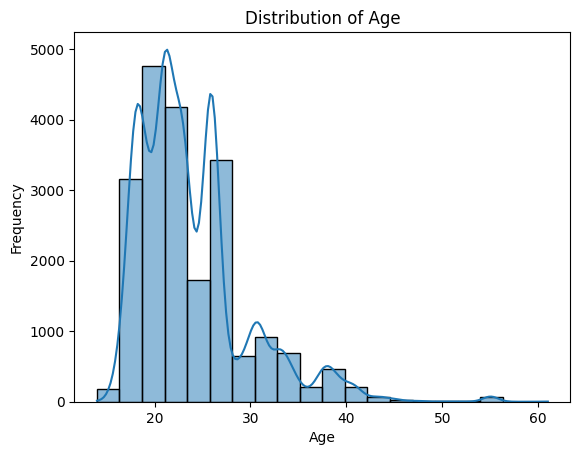

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


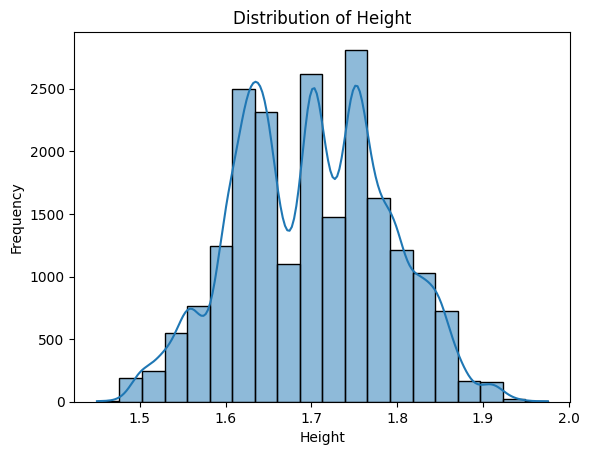

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


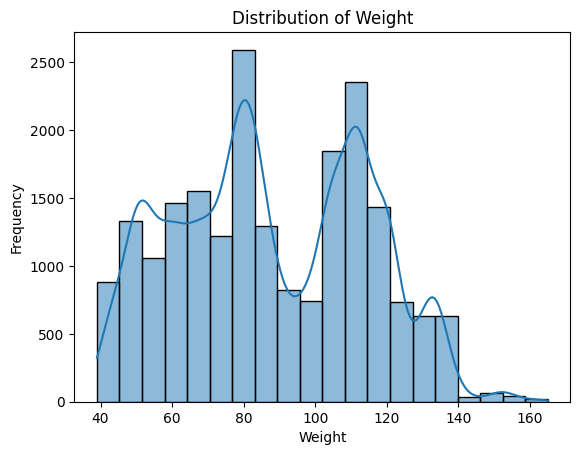

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


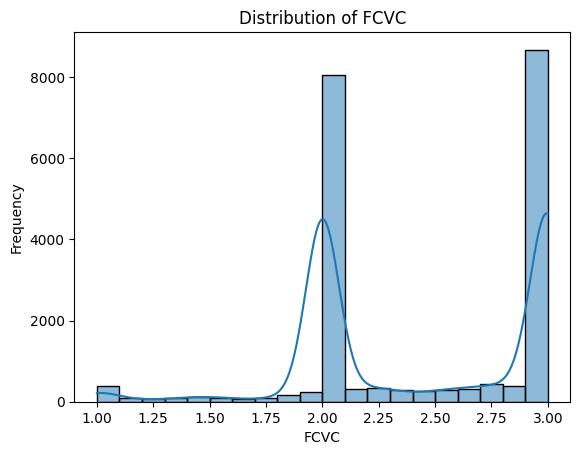

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


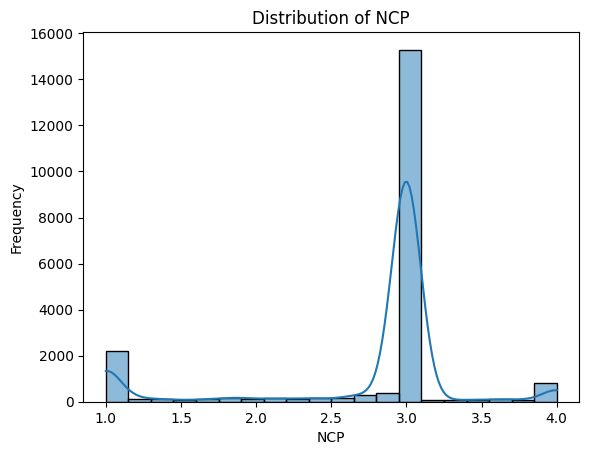

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


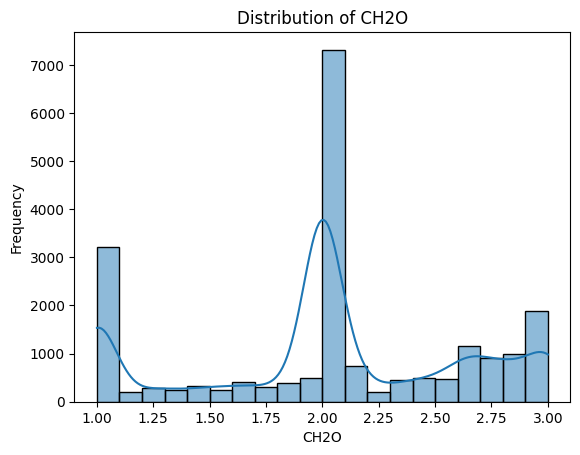

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


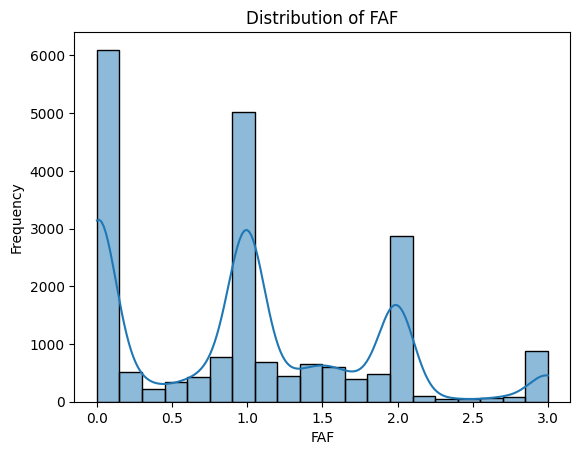

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


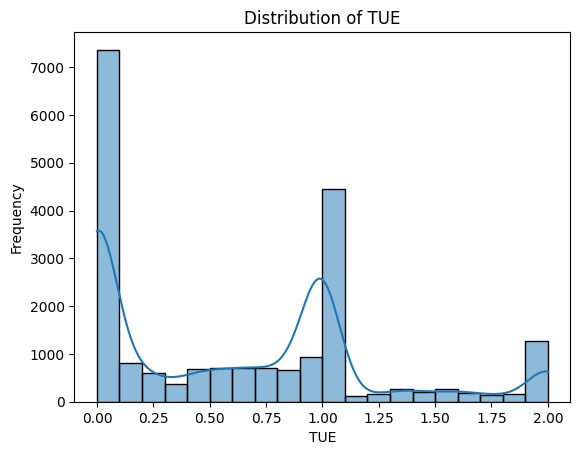

In [230]:
for col in numerical_features:
    sns.histplot(train[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [231]:
train.describe(include='O')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


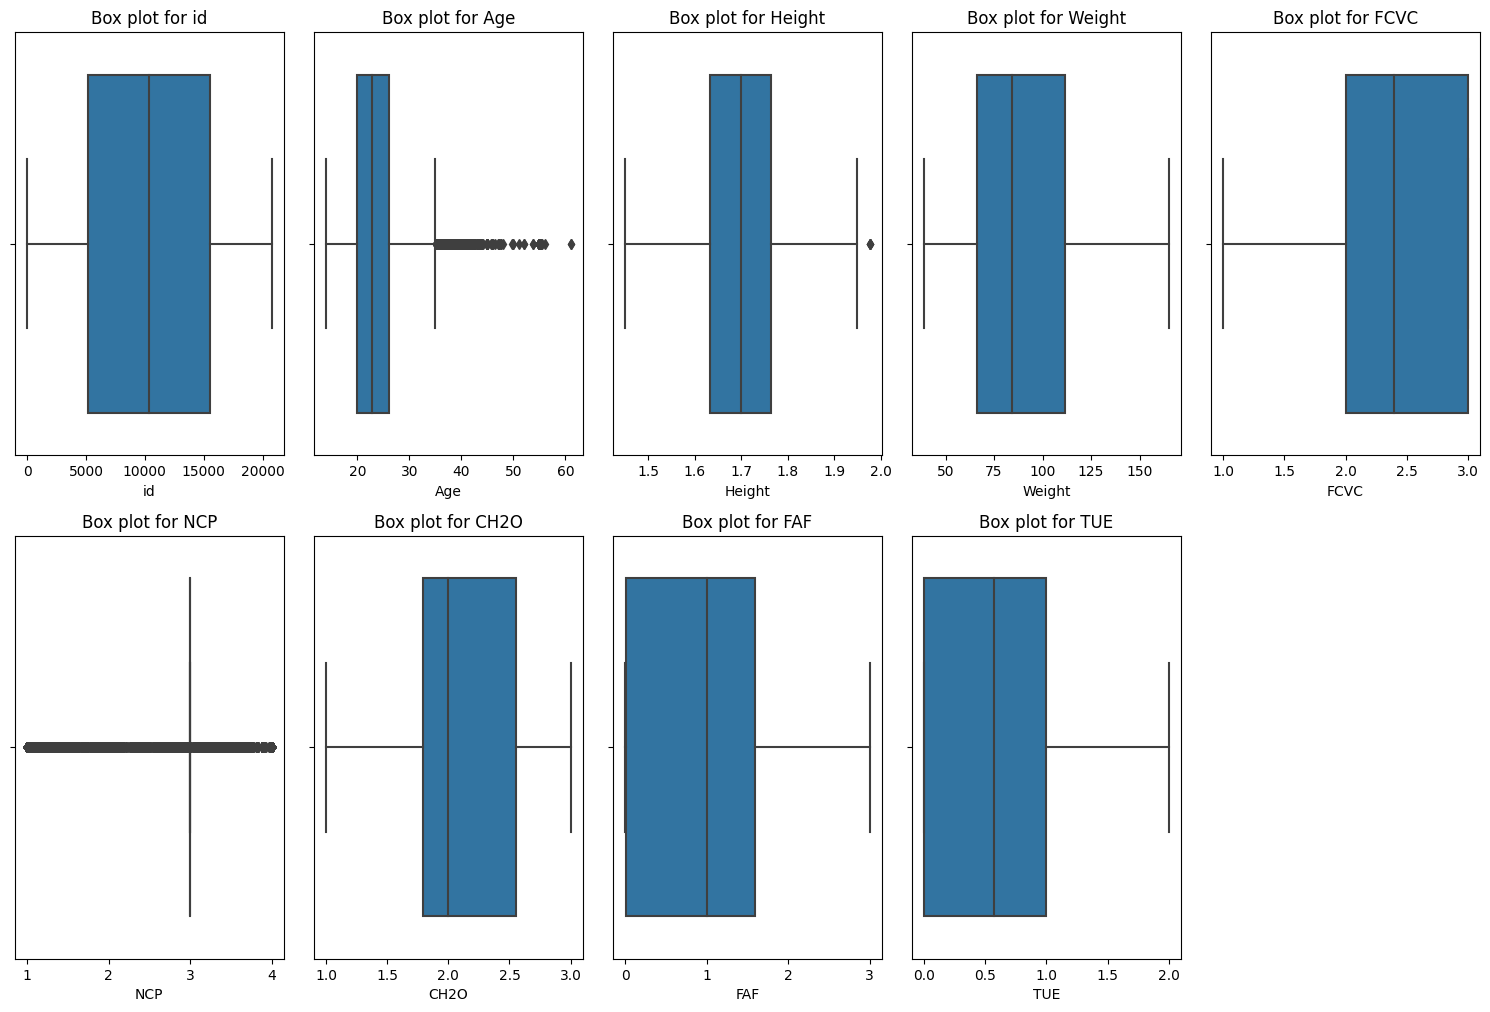

In [232]:
# this code will show the outliers

num_features = len(numerical_features)
num_rows = 8
num_cols = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,40))

'''
subplot returns a 2D index matrix to access the figures so when we flatten it in to 1D it's easier to access
'''
axes=axes.flatten()

for i, column in enumerate(numerical_features):
    if i < num_features:
        sns.boxplot(x=train[column], ax=axes[i])
        axes[i].set_title(f'Box plot for {column}')


for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [233]:
numerical_features = test.select_dtypes(include=['number'])

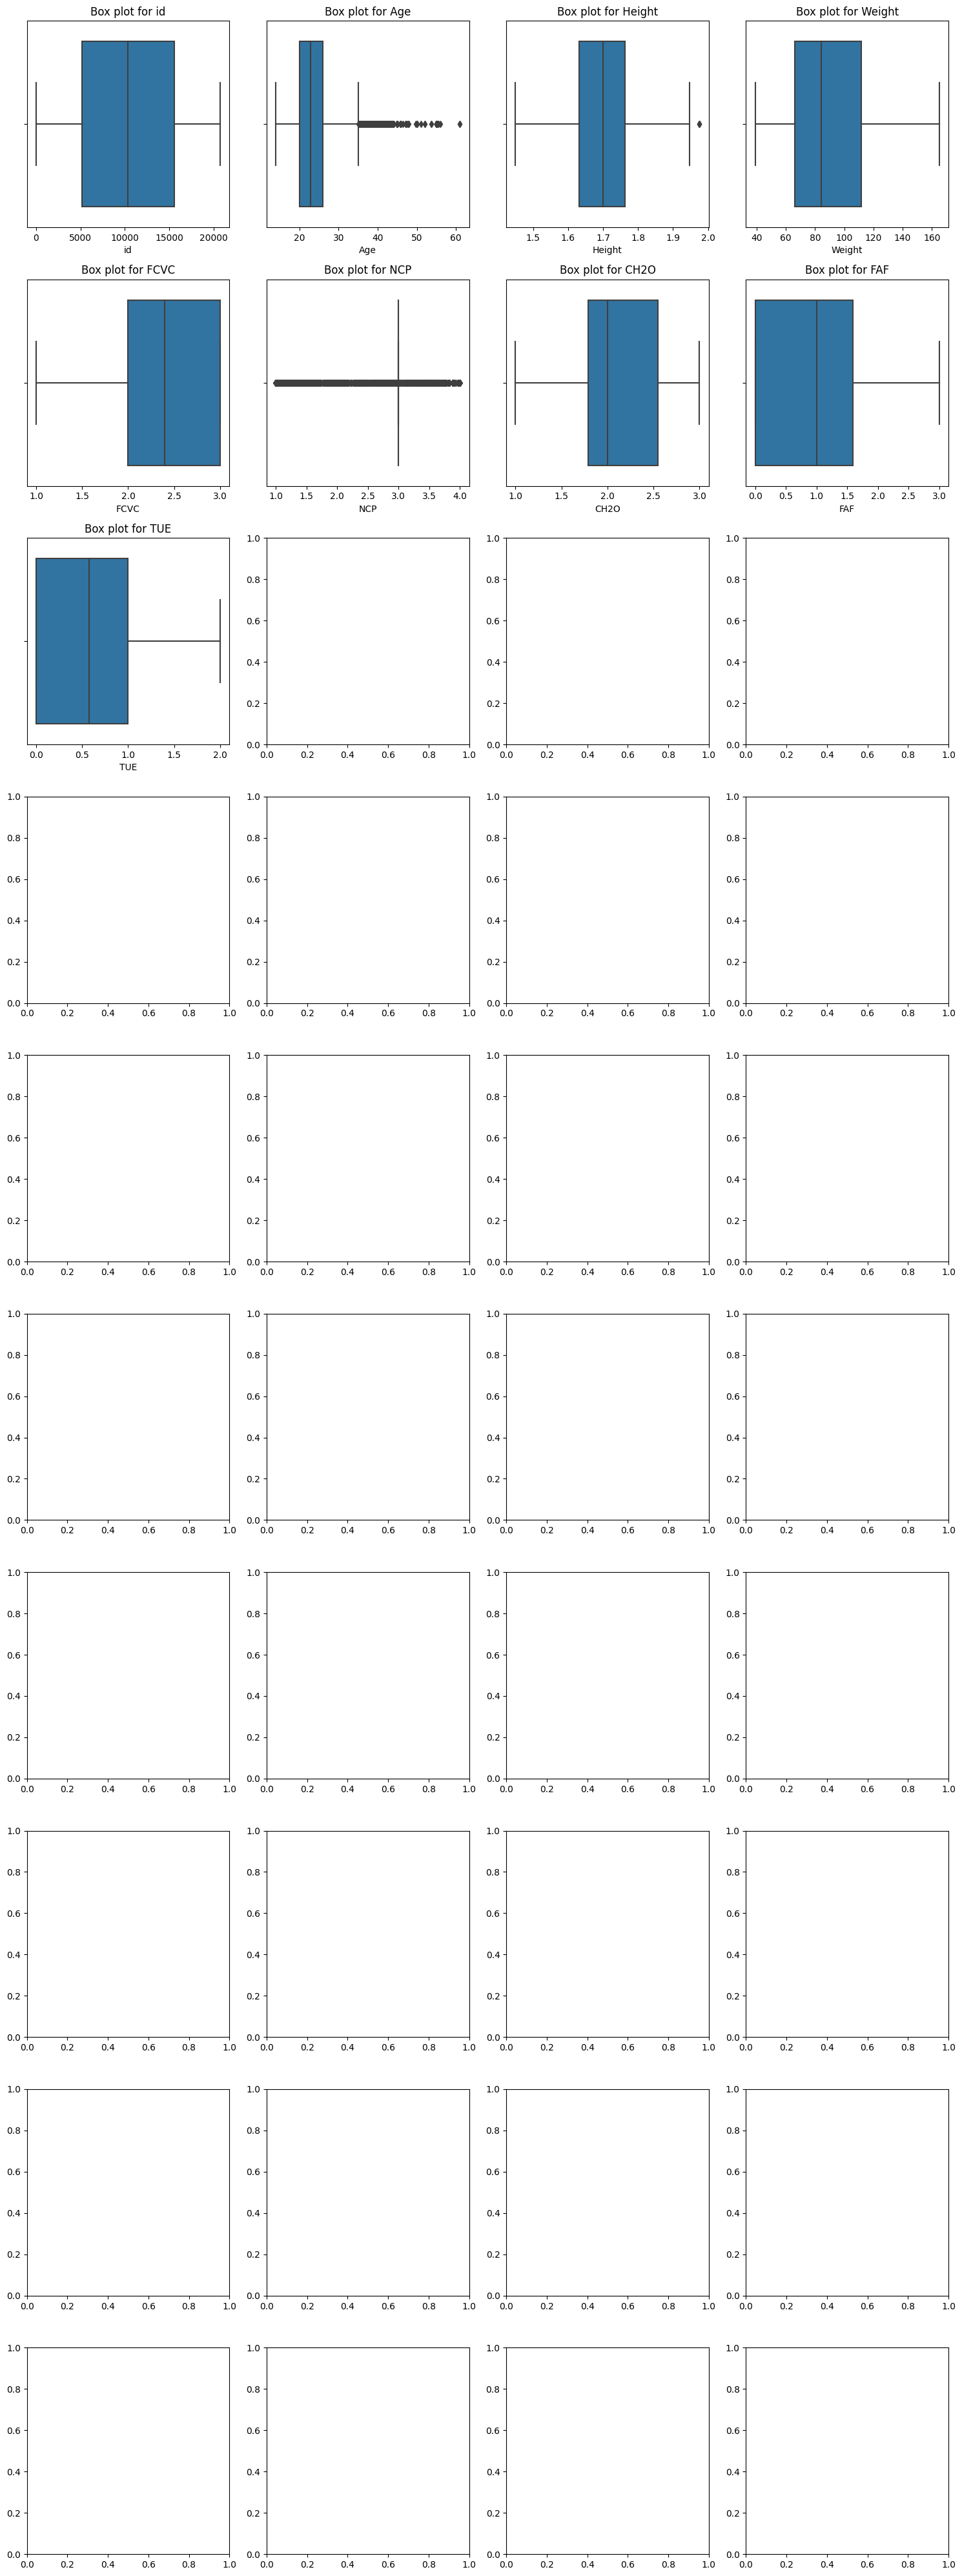

In [234]:
# this code will show the outliers

num_features = len(numerical_features)
num_rows = 10
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15,40))

'''
subplot returns a 2D index matrix to access the figures so when we flatten it in to 1D it's easier to access
'''
axes=axes.flatten()

for i, column in enumerate(numerical_features):
    if i < num_features:
        sns.boxplot(x=train[column], ax=axes[i])
        axes[i].set_title(f'Box plot for {column}')


for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [235]:
## train['Age'] & test['Age'] === Have outliers

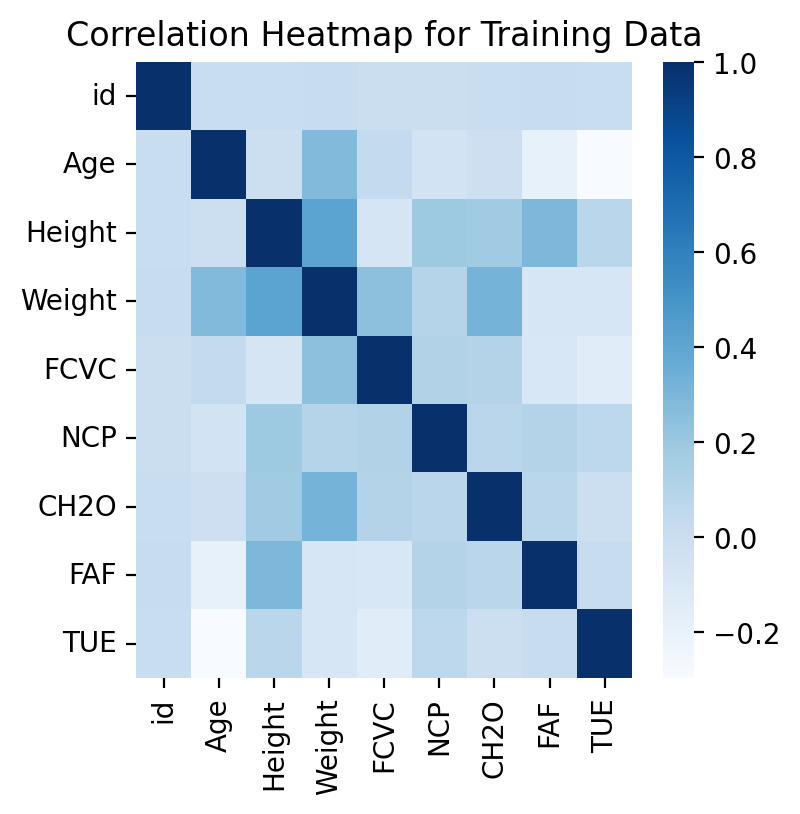

In [236]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(4,4), dpi=200)
sns.heatmap(corr, cmap="Blues")
plt.title('Correlation Heatmap for Training Data')
plt.show()

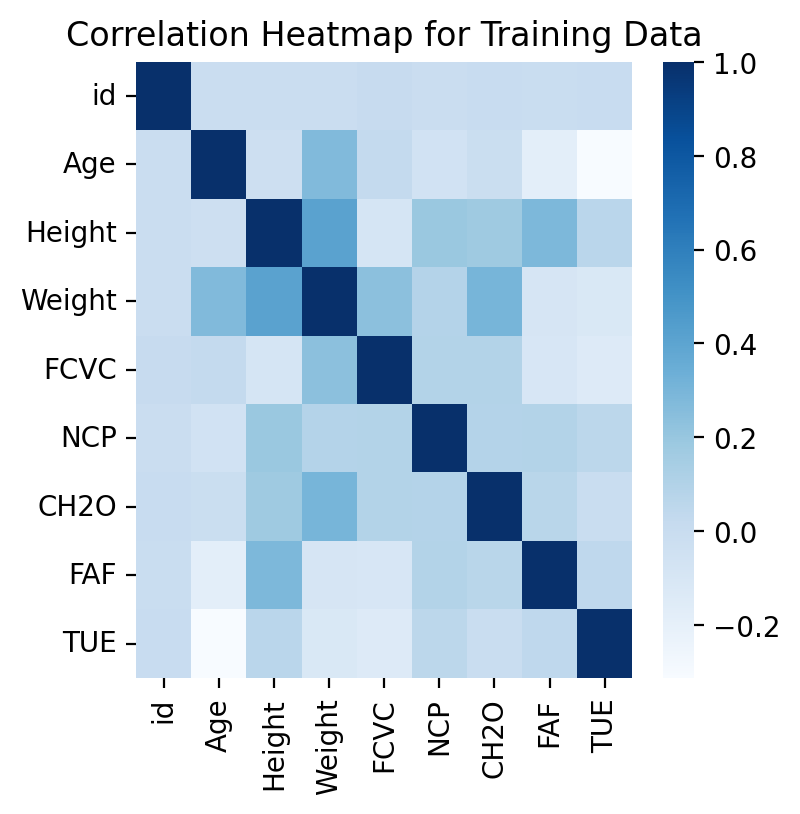

In [237]:
corr = test.corr(numeric_only=True)
plt.figure(figsize=(4,4), dpi=200)
sns.heatmap(corr, cmap="Blues")
plt.title('Correlation Heatmap for Training Data')
plt.show()

In [238]:
corr.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

### Label Encoding

In [239]:
from sklearn.preprocessing import LabelEncoder

label_encoder_mapping = {}  # To store the label mapping for each column

for col in categorical_features:
    # Create a new LabelEncoder for each column
    encoder = LabelEncoder()
    
    # Combine both training and test data for fitting the encoder
    combined_data = pd.concat([train[col], test[col]], axis=0)
    
    # Fit the encoder on the combined data
    encoder.fit(combined_data)
    
    # Transform both training and test data
    train[col] = train[col].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1)
    test[col] = test[col].map(lambda s: encoder.transform([s])[0] if s in encoder.classes_ else -1)
    
    # Store the label mapping for future reference
    label_encoder_mapping[col] = encoder.classes_


In [240]:
test['Gender'].unique()

array([1, 0])

In [247]:
train['NObeyesdad'] = encoder.fit_transform(train['NObeyesdad'])

In [248]:
train['NObeyesdad'].unique()

array([6, 1, 0, 4, 3, 5, 2])

In [249]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,2,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,0,1
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,2,0,1.910378,0,0.866045,1.673584,3,3,0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,2,0,1.674061,0,1.467863,0.780199,2,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,2,0,1.979848,0,1.967973,0.931721,2,3,6


In [250]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [251]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,2,0,2.825629,0,0.855400,0.000000,2,3
1,20759,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,2,0,3.000000,0,1.000000,0.000000,2,3
2,20760,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,2,0,2.621877,0,0.000000,0.250502,2,3
3,20761,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,2,0,2.786417,0,0.094851,0.000000,2,3
4,20762,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,2,0,2.653531,0,0.000000,0.741069,2,3


In [252]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  int64  
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  int64  
 6   FAVC                            13840 non-null  int64  
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  int64  
 10  SMOKE                           13840 non-null  int64  
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [253]:
train.to_csv('cleaned_train.csv', index=False)

In [254]:
test.to_csv('cleaned_test.csv', index=False)

In [255]:
import joblib

In [256]:
xg = joblib.load('xg.pkl')

In [257]:
y_pred = xg.predict(test)

In [276]:
y_pred.shape

(13840,)

In [277]:
inv = encoder.inverse_transform(y_pred)

In [278]:
inv

array(['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', ...,
       'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_II'],
      dtype=object)

In [279]:
inv.shape

(13840,)

In [280]:
id = np.array(test['id'])

In [281]:
res = np.column_stack((id, inv))

In [282]:
res.shape

(13840, 2)

In [283]:
res

array([[20758, 'Obesity_Type_II'],
       [20759, 'Overweight_Level_I'],
       [20760, 'Obesity_Type_III'],
       ...,
       [34595, 'Insufficient_Weight'],
       [34596, 'Normal_Weight'],
       [34597, 'Obesity_Type_II']], dtype=object)

In [286]:
# Specify the file path for the CSV
csv_path = 'submission1.csv'

# Save the NumPy array as a CSV file
np.savetxt(csv_path, res, delimiter=',', fmt='%s')